# 4. Feature Scaling

- 특정 feature 의 value 가 다른 feature 들 보다 훨씬 크면, 그 값이 목적함수를 지배하게 되므로 정확한 학습이 되지 않음

- sklearn 의 preprocessing module 은 scale, minmax_scale 함수와 이에 대응하는 StandardScaler, MinMaxScaler class 및 fit(), transform() method 를 제공하여 쉽게 scaling 을 할 수 있도록 지원

## 1) Simple Feature Scaling

$$ X_{new} = \frac{X_{old}}{X_{max}}$$
- 데이터의 최대 값으로 데이터 값들을 다 나눠주면 됨.
## 2) Min-Max Scaling
- 데이터값에서 그 데이터들의 최소값을 빼주고 구각능로 나눠주면 최솟값은 0 최댓값은 1로 스케일링이됨
- 최대/최소값이 1, 0 이 되도록 scaling  
- x=min 이면 y=0, x=max 이면 y=1.


$$ X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$$


## 3) Standard Scaling (Z-score)
- 어떤 값에서 평균을 빼주고 표준편차로 나눠줌, Z 스코어로 스케일링이 됨 이 숫자는 0을 중심으로 해서 마이너스 1에서 플러스 또는 -2 ~ +2  이런 식으로 쭉 분포가 되는 거임 (표준 정규 분포를 이룸)
- 평균과 표준편차를 이용하여 scaling  
- $\mu : 평균, \sigma : 표준편차 $

$$ X_{new} = \frac{X_{old} - \mu}{\sigma}$$


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [8]:
X = np.arange(-3,6).astype("float32").reshape(-1,1)
X = np.vstack([X,[20]]) # X 행렬에 수직으로 맨 및에 20의 큰 숫자가 하나 추가됨.
# 가상의 아웃라이어를 하나 추가해줌 
print(X.shape)
print(X) # 원래 X는 1차원 벡터로 이뤄져있기 때문에 reshape해서 행렬 형태로 만들어줘야함.
# min-max scaler나 standard 스케일러는 전부 행렬 형태로 데이터를 입력으로 받게 됨
# 그래서 행렬 형태로 바꿔줘야함. 

# 결과 : 9개의 행, 1개의 열로 이뤄진 행렬 형태로 X가 바뀜

(10, 1)
[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [20.]]


In [11]:
#Simple Scaling --> Image 처리할때 간단히 사용 0~255픽셀값
# 아무리 값이 커도 픽셀값의 최대는 255이기 때문에 최댓값인 255로 나눠줌 
# 그냥 250으로 나눠주면 자연스럽게 스케일링이 됨 
# 이런 원리를 이용해서 심플 스케일링은 이미지 처리할 때 많이 쓰이고 있음 
X_simple = X / X.max()
X_simple # 값 차이가 컸는데 스케일이 비슷한 형태로 바뀜 

array([[-0.15],
       [-0.1 ],
       [-0.05],
       [ 0.  ],
       [ 0.05],
       [ 0.1 ],
       [ 0.15],
       [ 0.2 ],
       [ 0.25],
       [ 1.  ]])

In [14]:
# Min Max Scaling
X_minmax = (X-X.min()) / (X.max() - X.min())
X_minmax

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [1.        ]])

In [17]:
sc = MinMaxScaler()
X_minmax2 = sc.fit_transform(X)
# fit이라고 할때 이 minmaxScaler라고 하는 함수는 x에서 이 최댓값,최솟값을 다 미리 계산해놓음(fit단계)
# transform 단계 : fit 단계에서 구한 min,max을 이 공식에 적용하는 단계
X_minmax2 #공식으로 했을때나 라이브버리를 사용했을때나 똑같음

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [1.        ]])

In [19]:
#Standard Scaling(직접 공식 사용했을때)
X_standard = (X - X.mean()) / X.std()
X_standard

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

In [20]:
sc = StandardScaler()
X_standard2 = sc.fit_transform(X)
X_standard2

array([[-0.95099461],
       [-0.78980908],
       [-0.62862356],
       [-0.46743803],
       [-0.3062525 ],
       [-0.14506697],
       [ 0.01611855],
       [ 0.17730408],
       [ 0.33848961],
       [ 2.75627252]])

Text(0.5, 1.0, 'Standard Scaling')

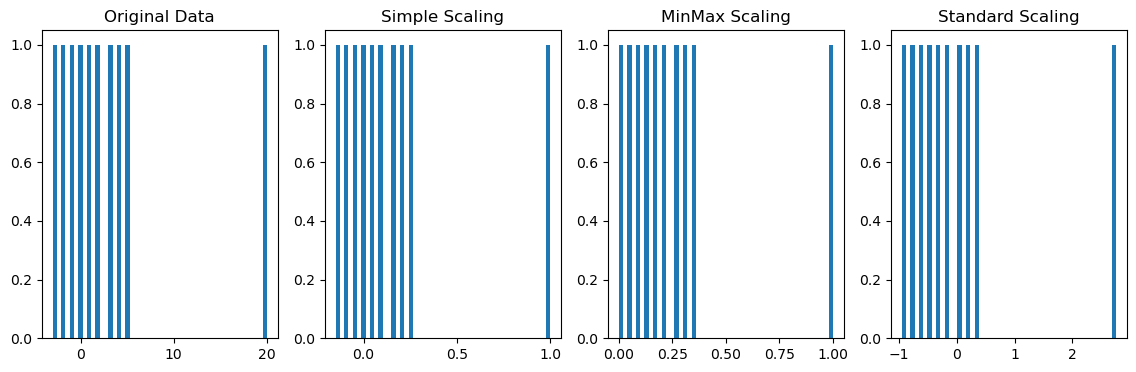

In [24]:
plt.figure(figsize = (14,4))
plt.subplot(1,4,1)
plt.hist(X, bins = 50)
plt.title("Original Data")

plt.subplot(1,4,2) # 최댓값 20이 1로 바뀜 
plt.hist(X_simple, bins = 50)
plt.title("Simple Scaling")

plt.subplot(1,4,3)
plt.hist(X_minmax, bins = 50) # 최솟값이 0, 최댓값이 1
plt.title("MinMax Scaling")

plt.subplot(1,4,4)
plt.hist(X_standard, bins = 50)
plt.title("Standard Scaling") #분포는 바뀌지 않았는데 이 값들
# 데이터의 값들이 value가 비슷하게 바뀜 
# 크기에 영향을 안 받고 정확하게 학습을 할 수 있